In [1]:
import seaborn as sns
import pandas as pd

In [2]:
cars = sns.load_dataset("mpg")
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
def standardize(x):
    return (x - x.mean()) / x.std()

In [4]:
cars["mpg_z"] = standardize(cars["mpg"])
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_z
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,-0.705551
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,-1.089379
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,-0.705551
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,-0.961437
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,-0.833494
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0.445936
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,2.620966
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,1.085650
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0.573879


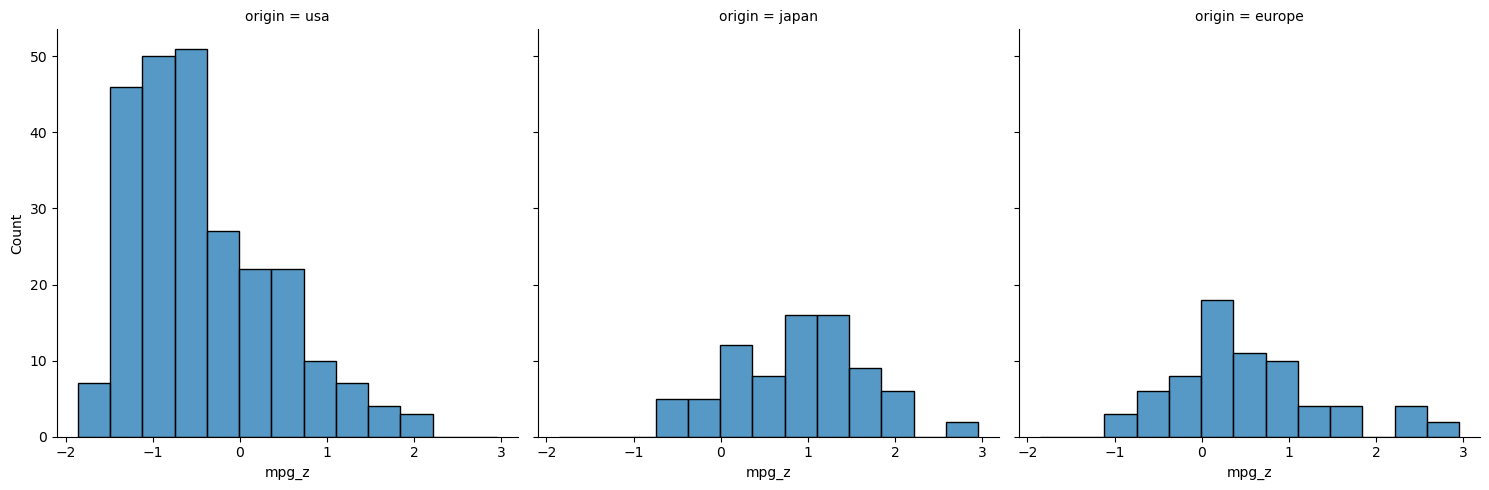

In [7]:
sns.displot(data=cars, x="mpg_z", col="origin");

In [8]:
cuts = pd.cut(cars["weight"], range(1500, 5800, 1000))
by_weight = cars.groupby(cuts)

In [9]:
cars["group_mpg_z"] = by_weight["mpg"].transform(standardize)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_z,group_mpg_z
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,-0.705551,0.837535
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,-1.089379,-0.249252
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,-0.705551,-0.956484
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,-0.961437,-1.377177
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,-0.833494,-1.166831
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,0.445936,0.936634
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,2.620966,2.279633
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,1.085650,0.233392
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,0.573879,1.146981


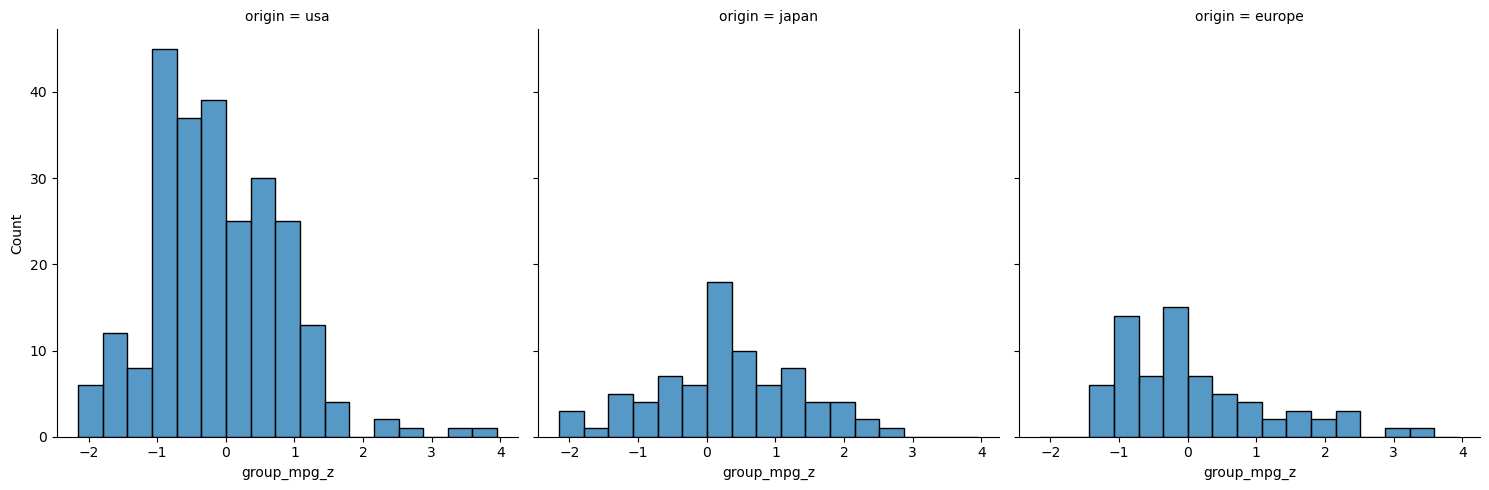

In [10]:
sns.displot(data=cars, x="group_mpg_z", col="origin");